In [18]:
import json
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show
import pycountry as pc
import plotly.express as px
%reload_ext autoreload
%autoreload 2


In [2]:
def cleanCountryName(country: str) -> str:
    '''
    Cleans up the scraped name with proper capitalization
    Parameters:
        country: current name of the country
    Returns:
        the country name properly capitalized and formatted
    '''
    country = country.replace("_", " ")
    country = country.split()

    new_name = []
    for i in country:
        if i == "of" or i == "the" or i == "and":
            new_name.append(i)
        else:
            new_name.append(i.capitalize())

    if new_name[-1] == "the":
        new_name = new_name[0:-1]

    return " ".join(new_name)

def sortByCountry(lang_data: "dict[list[dict]]", countries: "list[str] | str" = "all") -> "list[dict]":
    '''
    Sorts the scraped JSON data of the countries given.
    If no countries are given, it returns the sorted data for
    all countries
    Parameters:
        lang_data: the webscraped language data dictionary
        countries: list of strings 
        Returns:
        list of the language data for the given countries
    '''
    if isinstance(countries, str) and countries != "all":
        countries = [countries]

    all_countries = []
    if countries == "all":
        for country in lang_data.keys():
            cleaned_name = cleanCountryName(country)
            country_dict = {"country": cleaned_name, "langs": lang_data[country]}
            all_countries.append(country_dict)

    else:  
        for country in lang_data.keys():
            cleaned_name = cleanCountryName(country)
            if cleaned_name in countries:
                country_dict = {"country": cleaned_name, "langs": lang_data[country]}
                all_countries.append(country_dict)
    
    return all_countries

def sortByLang(lang_data: "dict[list[dict]]", language: str) -> "list[dict]":
    '''
    Finds all of the countries with the given language and 
    returns a list of them, with their associated percentages
    Parameters:
        lang_data: the webscraped language data dictionary
        language:  string of the language to find data for
    Returns:
        list of dicts of countries with the given langauge data
    Raises:
        Error if there are no countries with the given language
    '''
    countries = []
    for country in lang_data.keys():
        for lang in lang_data[country]:
            name = lang["name"]
           
            if language in name:
                country = cleanCountryName(country)
                lang["country"] = country
                countries.append(lang)

    if len(countries) == 0:
        raise ValueError("No countries have speakers of that language")

    return countries




In [38]:

def countryToCode(country_data: "list[dict]") -> "list[dict]":
    ''' 
    Uses the pycountry module to convert the country names 
    into their ISO 3166-1 alpha-3 codes for plotting
    Parameters:
        country_data: the list of country dictionaries
    Returns:
        a list where the dicts have an "iso" key pair
    '''
    new_data = []

    for i in range(len(country_data)):
        country = country_data[i]
        name    = country["country"]
        
        try:
            new_name = pc.countries.search_fuzzy(name)[0]
            new_name = new_name.alpha_3
            country["iso"] = new_name

            new_data.append(country)
            
        except:
            pass

    return new_data


def langChloropleth(language: str, lang_data: "list[dict]") -> None:
    ''' 
    Plots the chloropleth map of the given language
    Parameters:
        language:  string of the language name
        lang_data: the opened JSON file with the language data
    Returns:
        None, displays thr chloropleth map
    '''
    language = language.capitalize()

    country_data = sortByLang(lang_data, language)
    country_data = countryToCode(country_data)

    country_frame = pd.DataFrame.from_records(country_data, index = "name")
    country_frame["percent"] = country_frame["percent"].fillna(0)
    country_frame["percent"] = country_frame["percent"].replace("", 0)
    country_frame.rename(columns={"percent": "Speaker %"}, inplace=True)

    country_frame.loc[country_frame["Speaker %"] > 100, "Speaker %"] = 0
    

    fig = px.choropleth(country_frame, locations="iso",
                    color="Speaker %", 
                    hover_name="country", 
                    hover_data="note",
                    title=f"Countries with {language} speakers",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    width=1000,
                    height=700)


    fig.add_annotation(x=0.55, y=0, text="0 means no percentage is available, but the language is spoken there", showarrow=False, font=dict(color="black", size=10))

    fig.show()

In [37]:
def main() -> None:
    with open("language_data.json", "r") as read_file:
        lang_data = json.load(read_file)

    langChloropleth("spanish", lang_data)

SubdivisionHierarchy(code='NL-AW', country_code='NL', name='Aruba', parent_code=None, type='Country')
SubdivisionHierarchy(code='BZ-BZ', country_code='BZ', name='Belize', parent_code=None, type='District')
SubdivisionHierarchy(code='NL-CW', country_code='NL', name='Curaçao', parent_code=None, type='Country')
SubdivisionHierarchy(code='GT-GU', country_code='GT', name='Guatemala', parent_code=None, type='Department')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='PA-8', country_code='PA', name='Panamá', parent_code=None, type='Province')
SubdivisionHierarchy(code='US-PR', country_code='US', name='Puerto Rico', parent_code=None, type='Outlying area')
SubdivisionHierarchy(code='NL-SX', country_code='NL', name='Sint Maarten', parent_code=None, type='Country')


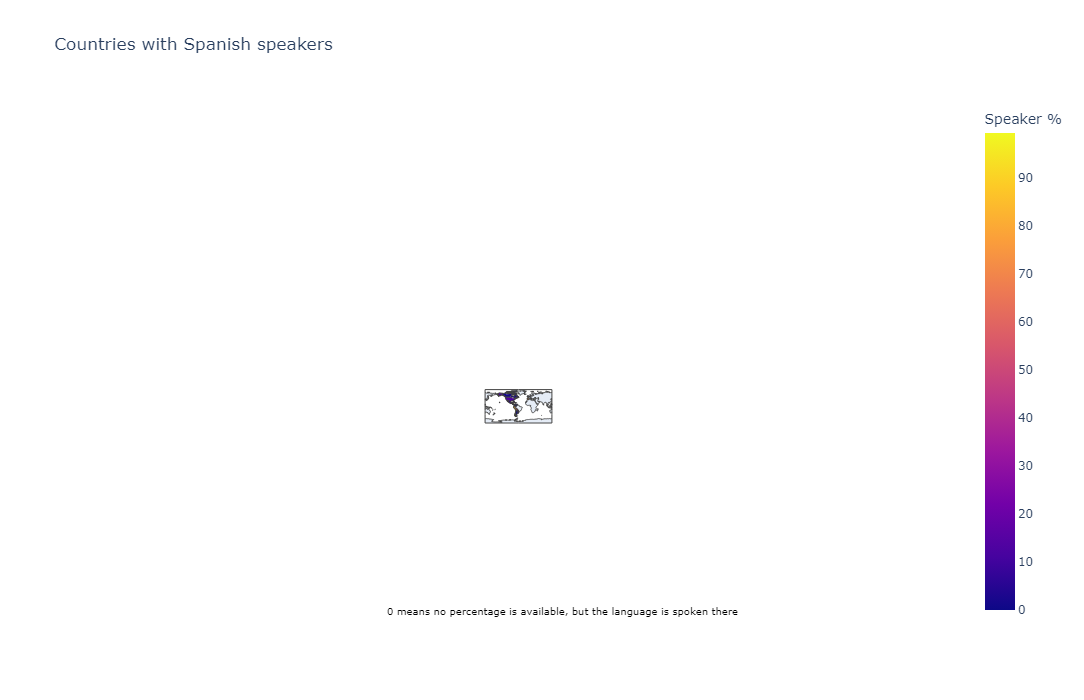

In [10]:
main()

In [36]:
with open("language_data.json", "r") as read_file:
    lang_data = json.load(read_file)

lang_data

{'world': [{'name': 'most-spoken language:\xa0English', 'percent': 16.5},
  {'name': 'Mandarin Chinese', 'percent': 14.6},
  {'name': 'Hindi', 'percent': 8.3},
  {'name': 'Spanish', 'percent': 7},
  {'name': 'French', 'percent': 3.6},
  {'name': 'Arabic', 'percent': 3.6},
  {'name': 'Bengali', 'percent': 3.4},
  {'name': 'Russian', 'percent': 3.4},
  {'name': 'Portuguese', 'percent': 3.3},
  {'name': 'Indonesian', 'percent': 2.6}],
 'afghanistan': [{'name': 'Afghan Persian or Dari',
   'percent': 77,
   'note': 'official; Dari functions as the lingua franca'},
  {'name': 'Pashto', 'percent': 48, 'note': 'official'},
  {'name': 'Uzbek', 'percent': 11},
  {'name': 'English', 'percent': 6},
  {'name': 'Turkmen', 'percent': 3},
  {'name': 'Urdu', 'percent': 3},
  {'name': 'Pashayi', 'percent': 1},
  {'name': 'Nuristani', 'percent': 1},
  {'name': 'Arabic', 'percent': 1},
  {'name': 'Balochi', 'percent': 1}],
 'akrotiri': [{'name': 'English'}, {'name': 'Greek'}],
 'albania': [{'name': 'Alba

In [11]:
lang_data.keys()

dict_keys(['world', 'afghanistan', 'akrotiri', 'albania', 'algeria', 'american_samoa', 'andorra', 'angola', 'anguilla', 'antarctica', 'antigua_and_barbuda', 'arctic_ocean', 'argentina', 'armenia', 'aruba', 'ashmore_and_cartier_islands', 'atlantic_ocean', 'australia', 'austria', 'azerbaijan', 'bahamas_the', 'bahrain', 'bangladesh', 'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bermuda', 'bhutan', 'bolivia', 'bosnia_and_herzegovina', 'botswana', 'bouvet_island', 'brazil', 'british_indian_ocean_territory', 'british_virgin_islands', 'brunei', 'bulgaria', 'burkina_faso', 'burma', 'burundi', 'cabo_verde', 'cambodia', 'cameroon', 'canada', 'cayman_islands', 'central_african_republic', 'chad', 'chile', 'china', 'christmas_island', 'clipperton_island', 'cocos_keeling_islands', 'colombia', 'comoros', 'congo_democratic_republic_of_the', 'congo_republic_of_the', 'cook_islands', 'coral_sea_islands', 'costa_rica', "cote_d'_ivoire", 'croatia', 'cuba', 'curacao', 'cyprus', 'czechia', 'denmark'

In [14]:
lang_data['hungary']

[{'name': 'Hungarian', 'percent': 99.6, 'note': 'official'},
 {'name': 'English', 'percent': 16},
 {'name': 'German', 'percent': 11.2},
 {'name': 'Russian', 'percent': 1.6},
 {'name': 'Romanian', 'percent': 1.3},
 {'name': 'French', 'percent': 1.2},
 {'name': 'other', 'percent': 4.2}]

In [68]:
#lang_data["india"]

In [69]:
# from bokeh.plotting import figure, show
# from bokeh.models import ColumnDataSource, Select
# from bokeh.layouts import layout
# from bokeh.io import output_notebook

# from bokeh.models import ColumnDataSource, Select, CustomJS

# output_notebook()

# import pandas as pd

# # Create a DataFrame
# df = pd.DataFrame()

# # Populate the DataFrame with language, country, and percentage columns
# for country, data in lang_data.items():
#     for entry in data:
#         percent = entry.get('percent', 0)
#         if percent > 100:
#             continue
        
#         df = pd.concat([df, pd.DataFrame({'Country': [country], 'Language': [entry['name']], 'Percentage': [percent]})])


# # Sort the DataFrame by percentage in descending order
# df = df.sort_values(by='Percentage', ascending=False)

# # Select the top 20 countries
# df_top_20 = df.head(20)

# # Bokeh plot
# source = ColumnDataSource(df_top_20)

# plot = figure(x_range=df_top_20['Country'], height=500, width=800, title="Top 20 Countries",
#               toolbar_location=None, tools="")

# plot.vbar(x='Country', top='Percentage', width=0.9, source=source, line_color="white")

# plot.xgrid.grid_line_color = None
# plot.y_range.start = 0
# plot.xaxis.major_label_orientation = "vertical"

# # Dropdown menu for language selection
# language_select = Select(title="Select Language:", value='Hungarian', options=list(df['Language'].unique()))

# # Dropdown menu for language selection
# language_select = Select(title="Select Language:", value='Hungarian', options=list(df['Language'].unique()))

# # JavaScript callback to update the plot based on the selected language
# callback = CustomJS(args=dict(source=source, language_select=language_select), code="""
#     var data = source.data;
#     var selected_language = language_select.value;
#     var indices = [];
#     for (var i = 0; i < data['Language'].length; i++) {
#         if (data['Language'][i] == selected_language) {
#             indices.push(i);
#         }
#     }
#     source.selected.indices = indices;
#     source.change.emit();
# """)

# language_select.js_on_change('value', callback)

# # Create layout and show in the notebook
# layout_ = layout([[language_select], [plot]])
# show(layout_, notebook_handle=True)

# # Create layout and add to document
# # layout = layout([[language_select], [plot]])
# # show(layout)



In [76]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Select, CustomJS
from bokeh.layouts import layout
from bokeh.io import output_notebook, output_file

output_notebook()
#output_file("test.html")

import json
import pandas as pd

# Load your language data from a JSON file
with open("language_data.json", "r") as read_file:
    lang_data = json.load(read_file)


# countries = []
# for key in lang_data:
#     countries.append(key)

# countries = ['world', 'united_states', 'india',
#              'afghanistan', 'albania', 'american_samoa', 'angola', 'armenia', 'aruba', 'australia', 'austria', 'azerbaijan', 
#  'bangladesh', 'belarus', 'belgium', 'belize', 'bhutan', 'bolivia', 'bosnia_and_herzegovina', 'botswana', 'bulgaria', 
#  'burkina_faso', 'burundi', 'cambodia', 'cameroon', 'canada', 'cayman_islands', 'chad', 'chile', 'christmas_island', 
#  'cocos_keeling_islands', 'cook_islands', "cote_d'_ivoire", 'croatia', 'curacao', 'cyprus', 'czechia', 'ecuador', 
#  'equatorial_guinea', 'estonia', 'ethiopia', 'falkland_islands_islas_malvinas', 'faroe_islands', 'finland', 'france', 
#  'french_polynesia', 'georgia', 'ghana', 'greece', 'guam', 'guatemala', 'hong_kong', 'hungary', 'india', 'jersey', 
#  'kazakhstan', 'kosovo', 'kyrgyzstan', 'latvia', 'liberia', 'liechtenstein', 'lithuania', 'luxembourg', 'macau', 
#  'mali', 'malta', 'marshall_islands', 'mauritius', 'mexico', 'moldova', 'mongolia', 'montenegro', 'mozambique', 
#  'namibia', 'nauru', 'nepal', 'new_caledonia', 'new_zealand', 'nicaragua', 'nigeria', 'niue', 'norfolk_island',
#  'north_macedonia', 'northern_mariana_islands', 'pakistan', 'palau', 'papua_new_guinea', 'paraguay', 'peru', 
#  'poland', 'romania', 'russia', 'rwanda', 'samoa', 'sao_tome_and_principe', 'serbia', 'seychelles', 'singapore',
#  'sint_maarten', 'slovakia', 'slovenia', 'solomon_islands', 'south_africa', 'spain', 'sri_lanka', 'switzerland', 
#  'taiwan', 'tajikistan', 'thailand', 'timor_leste', 'tokelau', 'tonga', 'turkmenistan', 'ukraine', 
#  'uzbekistan', 'vanuatu', 'virgin_islands', 'wallis_and_futuna', 'zambia', 'zimbabwe']

countries = ['world', 'united_states', 'india', 'france', 'russia', 'south_korea', 'japan',
             'afghanistan', 'american_samoa', 'angola', 'aruba', 'australia', 'austria', 'belize', 'bolivia', 'bosnia_and_herzegovina', 
 'botswana', 'bulgaria', 'canada', 'cayman_islands', 'chile', 'christmas_island', 'curacao', 'cyprus', 'estonia', 'ethiopia', 'georgia', 
 'ghana', 'guam', 'hong_kong', 'hungary', 'kosovo', 'liechtenstein', 'lithuania', 'luxembourg', 'macau', 'mali', 'mauritius', 
 'moldova', 'montenegro', 'mozambique', 'namibia', 'nepal', 'new_zealand', 'norfolk_island', 'north_macedonia', 'northern_mariana_islands', 
 'pakistan', 'palau', 'peru', 'romania', 'sao_tome_and_principe', 'serbia', 'seychelles', 'singapore', 'sint_maarten',
 'slovakia', 'south_africa', 'spain', 'switzerland', 'timor_leste', 'tokelau', 'tonga', 'vanuatu', 'zambia']

lang_to_percentages = {}

for key in lang_data:
    current_data = lang_data[key]
    for item in current_data:
        language = item['name']
        if "English" in language:
            language = "English"
        if "Spanish" in language:
            language = "Spanish"
        if language not in lang_to_percentages:
            lang_to_percentages[language] = []
            for c in countries:
                lang_to_percentages[language].append(0)
        if 'percent' not in item: 
            percent = 0 
        else:
            percent = item['percent']
        for i in range(len(countries)):
            if countries[i] == key:
                lang_to_percentages[language][i] = percent

print(lang_to_percentages)


Loading BokehJS ...

{'English': [16.5, 78.2, 0, 0, 0, 0, 0, 6, 3.9, 0, 7.1, 72.7, 0, 62.9, 0, 0, 2.8, 0, 58.7, 90.9, 10.2, 27.6, 3.1, 4.1, 0, 0, 0, 0, 43.6, 4.3, 16, 0, 0, 0, 2.1, 2.8, 0, 0, 0, 0, 0, 2.3, 0, 95.4, 44.9, 0, 17, 0, 19.1, 0, 0, 4.9, 0, 5.1, 36.9, 67.5, 0, 8.4, 0, 5.4, 0, 48.6, 0.7, 2, 1.7], 'Mandarin Chinese': [14.6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Hindi': [8.3, 0, 43.6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Spanish': [7, 13.4, 0, 0, 0, 0, 0, 0, 0, 0, 13.7, 0, 0, 56.6, 60.7, 0, 0, 0, 1.3, 4, 99.5, 0, 5.6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 82.9, 0, 0, 0, 0, 0, 12.9, 0, 0, 74, 2.4, 0, 0, 0, 0, 0], 'French': [3.6, 0, 0, 100, 0, 0, 0, 0, 0, 0, 

In [80]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, FactorRange, Select, CustomJS
from bokeh.layouts import layout
from bokeh.palettes import Category10
from bokeh.io import output_notebook, reset_output, output_file

reset_output()
output_notebook()
#output_file("language_distributions.html")

# Create initial data source
language = 'English'  # Default language
source = ColumnDataSource(data=dict(x=countries, y=lang_to_percentages[language]))

# Create the figure
p = figure(x_range=FactorRange(*countries), height=400, width=1000, title="Language Percentages by Country",
           toolbar_location=None, tools="")

p.vbar(x='x', top='y', width=0.9, source=source, line_color="white", fill_color=Category10[4][0])

# Customize the plot
p.y_range.start = 0
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.title.text_font_size = '16px'
p.xaxis.major_label_orientation = 1.2

# Create the dropdown menu
language_select = Select(title="Select Language:", value=language, options=list(lang_to_percentages.keys()))

# JavaScript callback function
callback = CustomJS(args=dict(source=source, language_select=language_select, lang_to_percentages=lang_to_percentages), code="""
    var data = source.data;
    var language = language_select.value;
    data['y'] = lang_to_percentages[language];
    source.change.emit();
""")

# Attach the callback to the dropdown menu
language_select.js_on_change('value', callback)

# Create layout
layout = layout([[language_select], [p]])

# Display the plot in the notebook
show(layout)


Loading BokehJS ...

In [78]:
country_count = []
for c in countries:
    country_count.append(0)
for key in lang_to_percentages:
    list_percentages = lang_to_percentages[key]
    for i in range(len(list_percentages)):
        if list_percentages[i] > 0:
            country_count[i] += 1
            

In [75]:

new_countries = []
for i in range(len(countries)):
    if country_count[i] < 5:
        continue
    else:
        new_countries.append(countries[i])

In [53]:
print(new_countries)

['world', 'afghanistan', 'american_samoa', 'angola', 'aruba', 'australia', 'austria', 'belize', 'bolivia', 'bosnia_and_herzegovina', 'botswana', 'bulgaria', 'canada', 'cayman_islands', 'chile', 'christmas_island', 'curacao', 'cyprus', 'estonia', 'ethiopia', 'georgia', 'ghana', 'guam', 'hong_kong', 'hungary', 'india', 'kosovo', 'liechtenstein', 'lithuania', 'luxembourg', 'macau', 'mali', 'mauritius', 'moldova', 'montenegro', 'mozambique', 'namibia', 'nepal', 'new_zealand', 'norfolk_island', 'north_macedonia', 'northern_mariana_islands', 'pakistan', 'palau', 'peru', 'romania', 'sao_tome_and_principe', 'serbia', 'seychelles', 'singapore', 'sint_maarten', 'slovakia', 'south_africa', 'spain', 'switzerland', 'timor_leste', 'tokelau', 'tonga', 'vanuatu', 'zambia']


In [54]:
len(new_countries)


60